In [47]:
import pandas as pd

In [48]:
ddf = pd.read_csv("deliveries.csv")
print(ddf.shape)
ddf.head()

(150460, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [49]:
mat = pd.read_csv("matches.csv")

In [93]:
squad = pd.read_csv("squad2018.csv")
squad.head()

,Unnamed: 0,matrix.nrow...35.,team,team.1,team.2,team.3,team.4,team.5,team.6,team.7
0,1,NaN,AT Rayudu,A Mishra,AD Nath,AD Russell,A Dananjaya,AM Rahane,AB de Villiers,A Hales
1,2,NaN,D Shorey,A Mishra,AJ Finch,AD Russell,A Dananjaya,Ankit Sharma,BB McCullum,B Kumar
2,3,NaN,D Willey,Ankit Sharma,AJ Tye,CA Lynn,AS Yadav,Anureet Singh,C de Grandhomme,B Kumar
3,4,NaN,DJ Bravo,Avesh Khan,AJ Tye,J Searles,BCJ Cutting,Anureet Singh,C de Grandhomme,B Stanlake
4,5,NaN,DJ Bravo,C Munro,AR Patel,J Searles,BCJ Cutting,B Laughlin,CJ Anderson,B Stanlake


In [95]:
squad = squad.drop(columns = ['unnamed: 0', 'matrix.nrow...35.'])
squad.head()

KeyError: "['unnamed: 0'] not found in axis"

In [56]:
ids=[]
for idx,row in mat.iterrows():
    if row.season==2017:
        ids.append(row.id)


In [61]:
df2017 = ddf.loc[ddf['match_id'].isin(ids)]
df2017.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [65]:
teams = list(df2017['batting_team'].unique())
teams

['Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Mumbai Indians',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Delhi Daredevils']

In [83]:
battingDict = {}
bowlingDict = {}
for team in teams:
    batsman = []
    bowler = []
    for idx,row in df2017.iterrows():
        if row.batting_team == team:
            batsman.append(row.batsman)
        if row.bowling_team == team:
            bowler.append(row.bowler)
    battingDict[team] = set(batsman)
    bowlingDict[team] = set(bowler)

In [91]:
for team in teams:
    print(team,len(battingDict[team]))

Sunrisers Hyderabad 15
Royal Challengers Bangalore 18
Mumbai Indians 17
Rising Pune Supergiant 20
Gujarat Lions 18
Kolkata Knight Riders 19
Kings XI Punjab 18
Delhi Daredevils 18


### Extracting batsman who played more than 10 matches

In [3]:
# total batsmen
len(ddf['batsman'].value_counts())

461

In [4]:
tempbatsmen = ddf['batsman'].value_counts().index
fullMatches = {}
for batter in tempbatsmen:
    fullMatches[batter] = len(ddf['match_id'].loc[ddf['batsman'] == batter].unique())
fullMatches

{'V Kohli': 141,
 'G Gambhir': 146,
 'SK Raina': 157,
 'RG Sharma': 153,
 'S Dhawan': 126,
 'RV Uthappa': 143,
 'DA Warner': 114,
 'MS Dhoni': 143,
 'AM Rahane': 105,
 'CH Gayle': 100,
 'AB de Villiers': 118,
 'KD Karthik': 134,
 'JH Kallis': 95,
 'BB McCullum': 103,
 'M Vijay': 99,
 'YK Pathan': 133,
 'PA Patel': 116,
 'Yuvraj Singh': 116,
 'SR Tendulkar': 78,
 'AT Rayudu': 105,
 'SR Watson': 98,
 'R Dravid': 82,
 'SE Marsh': 69,
 'MK Pandey': 95,
 'V Sehwag': 104,
 'DR Smith': 88,
 'KA Pollard': 112,
 'MEK Hussey': 58,
 'JP Duminy': 73,
 'AC Gilchrist': 80,
 'DPMD Jayawardene': 78,
 'RA Jadeja': 108,
 'MK Tiwary': 79,
 'KC Sangakkara': 68,
 'NV Ojha': 93,
 'SPD Smith': 62,
 'SC Ganguly': 56,
 'AJ Finch': 64,
 'S Badrinath': 65,
 'WP Saha': 78,
 'SV Samson': 62,
 'BJ Hodge': 63,
 'DA Miller': 64,
 'SS Tiwary': 64,
 'DJ Hussey': 61,
 'TM Dilshan': 50,
 'F du Plessis': 46,
 'DJ Bravo': 81,
 'IK Pathan': 82,
 'Mandeep Singh': 58,
 'KK Nair': 50,
 'LMP Simmons': 29,
 'Y Venugopal Rao': 52

In [5]:
# batsmen = []
# for k,v in fullMatches.items():
#     if v > 10:
#         batsmen.append(k)
# len(batsmen)

In [6]:
batsmen = tempbatsmen
len(batsmen)

461

In [7]:
# ddf['batsman'].loc[ddf['batsman'].value_counts() > 50]
# batsmen = ddf['batsman'].value_counts().loc[lambda x: x>20].index

## Hard Hitting Ability

In [11]:
fours = {}
for batter in batsmen:
    fours[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter] == 4)
fours

{'V Kohli': 384,
 'G Gambhir': 484,
 'SK Raina': 402,
 'RG Sharma': 354,
 'S Dhawan': 401,
 'RV Uthappa': 377,
 'DA Warner': 401,
 'MS Dhoni': 251,
 'AM Rahane': 320,
 'CH Gayle': 297,
 'AB de Villiers': 287,
 'KD Karthik': 286,
 'JH Kallis': 255,
 'BB McCullum': 277,
 'M Vijay': 237,
 'YK Pathan': 240,
 'PA Patel': 297,
 'Yuvraj Singh': 205,
 'SR Tendulkar': 296,
 'AT Rayudu': 205,
 'SR Watson': 258,
 'R Dravid': 269,
 'SE Marsh': 269,
 'MK Pandey': 197,
 'V Sehwag': 334,
 'DR Smith': 245,
 'KA Pollard': 158,
 'MEK Hussey': 198,
 'JP Duminy': 123,
 'AC Gilchrist': 239,
 'DPMD Jayawardene': 200,
 'RA Jadeja': 125,
 'MK Tiwary': 152,
 'KC Sangakkara': 195,
 'NV Ojha': 121,
 'SPD Smith': 151,
 'SC Ganguly': 137,
 'AJ Finch': 170,
 'S Badrinath': 154,
 'WP Saha': 130,
 'SV Samson': 112,
 'BJ Hodge': 122,
 'DA Miller': 104,
 'SS Tiwary': 93,
 'DJ Hussey': 90,
 'TM Dilshan': 140,
 'F du Plessis': 110,
 'DJ Bravo': 102,
 'IK Pathan': 88,
 'Mandeep Singh': 134,
 'KK Nair': 135,
 'LMP Simmons'

In [12]:
sixes = {}
for batter in batsmen:
    sixes[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter] == 6)
sixes

{'V Kohli': 160,
 'G Gambhir': 58,
 'SK Raina': 174,
 'RG Sharma': 173,
 'S Dhawan': 71,
 'RV Uthappa': 125,
 'DA Warner': 160,
 'MS Dhoni': 156,
 'AM Rahane': 60,
 'CH Gayle': 266,
 'AB de Villiers': 158,
 'KD Karthik': 71,
 'JH Kallis': 44,
 'BB McCullum': 124,
 'M Vijay': 89,
 'YK Pathan': 149,
 'PA Patel': 35,
 'Yuvraj Singh': 141,
 'SR Tendulkar': 29,
 'AT Rayudu': 79,
 'SR Watson': 122,
 'R Dravid': 28,
 'SE Marsh': 78,
 'MK Pandey': 65,
 'V Sehwag': 106,
 'DR Smith': 117,
 'KA Pollard': 148,
 'MEK Hussey': 52,
 'JP Duminy': 78,
 'AC Gilchrist': 92,
 'DPMD Jayawardene': 40,
 'RA Jadeja': 57,
 'MK Tiwary': 39,
 'KC Sangakkara': 27,
 'NV Ojha': 79,
 'SPD Smith': 45,
 'SC Ganguly': 42,
 'AJ Finch': 59,
 'S Badrinath': 28,
 'WP Saha': 57,
 'SV Samson': 57,
 'BJ Hodge': 43,
 'DA Miller': 78,
 'SS Tiwary': 45,
 'DJ Hussey': 60,
 'TM Dilshan': 24,
 'F du Plessis': 38,
 'DJ Bravo': 48,
 'IK Pathan': 38,
 'Mandeep Singh': 18,
 'KK Nair': 26,
 'LMP Simmons': 44,
 'Y Venugopal Rao': 37,
 'L

In [15]:
dict(sorted(fours.items(), key = lambda x: x[1], reverse = True))

{'G Gambhir': 484,
 'SK Raina': 402,
 'S Dhawan': 401,
 'DA Warner': 401,
 'V Kohli': 384,
 'RV Uthappa': 377,
 'RG Sharma': 354,
 'V Sehwag': 334,
 'AM Rahane': 320,
 'CH Gayle': 297,
 'PA Patel': 297,
 'SR Tendulkar': 296,
 'AB de Villiers': 287,
 'KD Karthik': 286,
 'BB McCullum': 277,
 'R Dravid': 269,
 'SE Marsh': 269,
 'SR Watson': 258,
 'JH Kallis': 255,
 'MS Dhoni': 251,
 'DR Smith': 245,
 'YK Pathan': 240,
 'AC Gilchrist': 239,
 'M Vijay': 237,
 'Yuvraj Singh': 205,
 'AT Rayudu': 205,
 'DPMD Jayawardene': 200,
 'MEK Hussey': 198,
 'MK Pandey': 197,
 'KC Sangakkara': 195,
 'AJ Finch': 170,
 'KA Pollard': 158,
 'S Badrinath': 154,
 'MK Tiwary': 152,
 'SPD Smith': 151,
 'TM Dilshan': 140,
 'SC Ganguly': 137,
 'KK Nair': 135,
 'Mandeep Singh': 134,
 'WP Saha': 130,
 'RA Jadeja': 125,
 'JP Duminy': 123,
 'BJ Hodge': 122,
 'NV Ojha': 121,
 'ML Hayden': 121,
 'SV Samson': 112,
 'F du Plessis': 110,
 'LMP Simmons': 109,
 'DA Miller': 104,
 'DJ Bravo': 102,
 'GJ Maxwell': 96,
 'M Vohra

In [16]:
balls_played = {}
for batter in batsmen:
    balls_played[batter] = ddf['batsman'].value_counts()[batter] # .loc[lambda x: x>50][batter]
balls_played

{'V Kohli': 3494,
 'G Gambhir': 3433,
 'SK Raina': 3369,
 'RG Sharma': 3274,
 'S Dhawan': 3005,
 'RV Uthappa': 2960,
 'DA Warner': 2902,
 'MS Dhoni': 2680,
 'AM Rahane': 2602,
 'CH Gayle': 2532,
 'AB de Villiers': 2402,
 'KD Karthik': 2360,
 'JH Kallis': 2291,
 'BB McCullum': 2181,
 'M Vijay': 2092,
 'YK Pathan': 2076,
 'PA Patel': 2060,
 'Yuvraj Singh': 2050,
 'SR Tendulkar': 2044,
 'AT Rayudu': 1964,
 'SR Watson': 1949,
 'R Dravid': 1918,
 'SE Marsh': 1913,
 'MK Pandey': 1901,
 'V Sehwag': 1833,
 'DR Smith': 1803,
 'KA Pollard': 1674,
 'MEK Hussey': 1648,
 'JP Duminy': 1634,
 'AC Gilchrist': 1555,
 'DPMD Jayawardene': 1522,
 'RA Jadeja': 1458,
 'MK Tiwary': 1444,
 'KC Sangakkara': 1424,
 'NV Ojha': 1356,
 'SPD Smith': 1333,
 'SC Ganguly': 1326,
 'AJ Finch': 1270,
 'S Badrinath': 1245,
 'WP Saha': 1219,
 'SV Samson': 1165,
 'BJ Hodge': 1153,
 'DA Miller': 1135,
 'SS Tiwary': 1111,
 'DJ Hussey': 1101,
 'TM Dilshan': 1047,
 'F du Plessis': 1043,
 'DJ Bravo': 1032,
 'IK Pathan': 985,
 'M

In [11]:
def hard_hitting_ability(fours, sixes, balls):
    return (fours + sixes)/balls

In [12]:
print(len(fours), len(sixes), len(balls_played))

461 461 461


In [13]:
hardHitting = {}
for batter in batsmen:
    hardHitting[batter] = hard_hitting_ability(fours[batter], sixes[batter], balls_played[batter])
hardHitting

{'V Kohli': 0.15569547796222094,
 'G Gambhir': 0.15787940576755025,
 'SK Raina': 0.1709706144256456,
 'RG Sharma': 0.160965180207697,
 'S Dhawan': 0.15707154742096505,
 'RV Uthappa': 0.16959459459459458,
 'DA Warner': 0.19331495520330808,
 'MS Dhoni': 0.15186567164179104,
 'AM Rahane': 0.1460415065334358,
 'CH Gayle': 0.22235387045813587,
 'AB de Villiers': 0.18526228143213988,
 'KD Karthik': 0.15127118644067797,
 'JH Kallis': 0.13051069402007856,
 'BB McCullum': 0.18386061439706555,
 'M Vijay': 0.15583173996175909,
 'YK Pathan': 0.18737957610789982,
 'PA Patel': 0.16116504854368932,
 'Yuvraj Singh': 0.16878048780487806,
 'SR Tendulkar': 0.15900195694716243,
 'AT Rayudu': 0.1446028513238289,
 'SR Watson': 0.19497178040020524,
 'R Dravid': 0.1548488008342023,
 'SE Marsh': 0.18139048614741243,
 'MK Pandey': 0.13782219884271435,
 'V Sehwag': 0.24004364429896344,
 'DR Smith': 0.20077648363838047,
 'KA Pollard': 0.1827956989247312,
 'MEK Hussey': 0.15169902912621358,
 'JP Duminy': 0.1230110

## Finisher

In [14]:
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
len(ddf['match_id'].loc[ddf['batsman'] == batsmen[1]].unique())

146

In [16]:
batsmen[1],len(ddf['player_dismissed'].loc[ddf['player_dismissed'] == batsmen[1]])

('G Gambhir', 131)

In [17]:
finisher = dict.fromkeys(batsmen,0)
for key,val in finisher.items():
    totalMatches = len(ddf['match_id'].loc[ddf['batsman'] == key].unique())
    outs = len(ddf['player_dismissed'].loc[ddf['player_dismissed'] == key])
    notouts = totalMatches - outs
    finisher[key] = notouts/totalMatches
finisher

{'V Kohli': 0.16312056737588654,
 'G Gambhir': 0.10273972602739725,
 'SK Raina': 0.1464968152866242,
 'RG Sharma': 0.1568627450980392,
 'S Dhawan': 0.1349206349206349,
 'RV Uthappa': 0.1048951048951049,
 'DA Warner': 0.12280701754385964,
 'MS Dhoni': 0.34265734265734266,
 'AM Rahane': 0.13333333333333333,
 'CH Gayle': 0.11,
 'AB de Villiers': 0.2288135593220339,
 'KD Karthik': 0.12686567164179105,
 'JH Kallis': 0.10526315789473684,
 'BB McCullum': 0.04854368932038835,
 'M Vijay': 0.04040404040404041,
 'YK Pathan': 0.2631578947368421,
 'PA Patel': 0.07758620689655173,
 'Yuvraj Singh': 0.12931034482758622,
 'SR Tendulkar': 0.11538461538461539,
 'AT Rayudu': 0.1523809523809524,
 'SR Watson': 0.1326530612244898,
 'R Dravid': 0.06097560975609756,
 'SE Marsh': 0.08695652173913043,
 'MK Pandey': 0.17894736842105263,
 'V Sehwag': 0.04807692307692308,
 'DR Smith': 0.045454545454545456,
 'KA Pollard': 0.26785714285714285,
 'MEK Hussey': 0.1206896551724138,
 'JP Duminy': 0.3150684931506849,
 'AC 

In [18]:
# outs = dict.fromkeys(batsmen,0)
# for match in matches:
#     tempdf = ddf.loc[ddf['match_id'] == match]
#     for idx, row in tempdf.iterrows():
#         if row.player_dismissed == row.batsman:
#             if row.batsman in outs.keys():
#                 outs[row.batsman] += 1 
# outs

## Fast Scoring Ability

In [19]:
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
balls_played = {}
for batter in batsmen:
    balls_played[batter] = ddf['batsman'].value_counts()[batter] # .loc[lambda x: x>50][batter]
balls_played

{'V Kohli': 3494,
 'G Gambhir': 3433,
 'SK Raina': 3369,
 'RG Sharma': 3274,
 'S Dhawan': 3005,
 'RV Uthappa': 2960,
 'DA Warner': 2902,
 'MS Dhoni': 2680,
 'AM Rahane': 2602,
 'CH Gayle': 2532,
 'AB de Villiers': 2402,
 'KD Karthik': 2360,
 'JH Kallis': 2291,
 'BB McCullum': 2181,
 'M Vijay': 2092,
 'YK Pathan': 2076,
 'PA Patel': 2060,
 'Yuvraj Singh': 2050,
 'SR Tendulkar': 2044,
 'AT Rayudu': 1964,
 'SR Watson': 1949,
 'R Dravid': 1918,
 'SE Marsh': 1913,
 'MK Pandey': 1901,
 'V Sehwag': 1833,
 'DR Smith': 1803,
 'KA Pollard': 1674,
 'MEK Hussey': 1648,
 'JP Duminy': 1634,
 'AC Gilchrist': 1555,
 'DPMD Jayawardene': 1522,
 'RA Jadeja': 1458,
 'MK Tiwary': 1444,
 'KC Sangakkara': 1424,
 'NV Ojha': 1356,
 'SPD Smith': 1333,
 'SC Ganguly': 1326,
 'AJ Finch': 1270,
 'S Badrinath': 1245,
 'WP Saha': 1219,
 'SV Samson': 1165,
 'BJ Hodge': 1153,
 'DA Miller': 1135,
 'SS Tiwary': 1111,
 'DJ Hussey': 1101,
 'TM Dilshan': 1047,
 'F du Plessis': 1043,
 'DJ Bravo': 1032,
 'IK Pathan': 985,
 'M

In [21]:
sum(ddf['batsman_runs'].loc[ddf['batsman'] == batsmen[0]].values)

4423

In [22]:
total_runs = {}
for batter in batsmen:
    total_runs[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter].values)
total_runs

{'V Kohli': 4423,
 'G Gambhir': 4132,
 'SK Raina': 4548,
 'RG Sharma': 4207,
 'S Dhawan': 3561,
 'RV Uthappa': 3778,
 'DA Warner': 4014,
 'MS Dhoni': 3560,
 'AM Rahane': 3057,
 'CH Gayle': 3651,
 'AB de Villiers': 3486,
 'KD Karthik': 2903,
 'JH Kallis': 2427,
 'BB McCullum': 2755,
 'M Vijay': 2511,
 'YK Pathan': 2922,
 'PA Patel': 2322,
 'Yuvraj Singh': 2591,
 'SR Tendulkar': 2334,
 'AT Rayudu': 2416,
 'SR Watson': 2628,
 'R Dravid': 2174,
 'SE Marsh': 2489,
 'MK Pandey': 2223,
 'V Sehwag': 2728,
 'DR Smith': 2385,
 'KA Pollard': 2354,
 'MEK Hussey': 1977,
 'JP Duminy': 1993,
 'AC Gilchrist': 2069,
 'DPMD Jayawardene': 1808,
 'RA Jadeja': 1732,
 'MK Tiwary': 1648,
 'KC Sangakkara': 1687,
 'NV Ojha': 1553,
 'SPD Smith': 1713,
 'SC Ganguly': 1349,
 'AJ Finch': 1604,
 'S Badrinath': 1441,
 'WP Saha': 1557,
 'SV Samson': 1426,
 'BJ Hodge': 1400,
 'DA Miller': 1563,
 'SS Tiwary': 1276,
 'DJ Hussey': 1322,
 'TM Dilshan': 1153,
 'F du Plessis': 1295,
 'DJ Bravo': 1262,
 'IK Pathan': 1150,
 '

In [23]:
fastScoring = {}
for batter in batsmen:
    fastScoring[batter] = total_runs[batter]/balls_played[batter]
fastScoring

{'V Kohli': 1.2658843732112193,
 'G Gambhir': 1.2036120011651616,
 'SK Raina': 1.3499554764024932,
 'RG Sharma': 1.2849725106902872,
 'S Dhawan': 1.1850249584026622,
 'RV Uthappa': 1.2763513513513514,
 'DA Warner': 1.383184011026878,
 'MS Dhoni': 1.328358208955224,
 'AM Rahane': 1.1748654880860876,
 'CH Gayle': 1.4419431279620853,
 'AB de Villiers': 1.4512905911740217,
 'KD Karthik': 1.2300847457627118,
 'JH Kallis': 1.0593627237014405,
 'BB McCullum': 1.2631820265933058,
 'M Vijay': 1.2002868068833652,
 'YK Pathan': 1.407514450867052,
 'PA Patel': 1.1271844660194175,
 'Yuvraj Singh': 1.2639024390243903,
 'SR Tendulkar': 1.1418786692759295,
 'AT Rayudu': 1.230142566191446,
 'SR Watson': 1.3483837865572088,
 'R Dravid': 1.1334723670490094,
 'SE Marsh': 1.3010977522216414,
 'MK Pandey': 1.1693845344555498,
 'V Sehwag': 1.4882705946535735,
 'DR Smith': 1.3227953410981697,
 'KA Pollard': 1.4062126642771804,
 'MEK Hussey': 1.1996359223300972,
 'JP Duminy': 1.2197062423500613,
 'AC Gilchrist

## Consistency

In [24]:
outs = {}
for batter in batsmen:
    outs[batter] = len(ddf['player_dismissed'].loc[ddf['player_dismissed'] == batter])
outs

{'V Kohli': 118,
 'G Gambhir': 131,
 'SK Raina': 134,
 'RG Sharma': 129,
 'S Dhawan': 109,
 'RV Uthappa': 128,
 'DA Warner': 100,
 'MS Dhoni': 94,
 'AM Rahane': 91,
 'CH Gayle': 89,
 'AB de Villiers': 91,
 'KD Karthik': 117,
 'JH Kallis': 85,
 'BB McCullum': 98,
 'M Vijay': 95,
 'YK Pathan': 98,
 'PA Patel': 107,
 'Yuvraj Singh': 101,
 'SR Tendulkar': 69,
 'AT Rayudu': 89,
 'SR Watson': 85,
 'R Dravid': 77,
 'SE Marsh': 63,
 'MK Pandey': 78,
 'V Sehwag': 99,
 'DR Smith': 84,
 'KA Pollard': 82,
 'MEK Hussey': 51,
 'JP Duminy': 50,
 'AC Gilchrist': 76,
 'DPMD Jayawardene': 64,
 'RA Jadeja': 72,
 'MK Tiwary': 56,
 'KC Sangakkara': 65,
 'NV Ojha': 74,
 'SPD Smith': 46,
 'SC Ganguly': 53,
 'AJ Finch': 59,
 'S Badrinath': 47,
 'WP Saha': 61,
 'SV Samson': 56,
 'BJ Hodge': 42,
 'DA Miller': 45,
 'SS Tiwary': 45,
 'DJ Hussey': 49,
 'TM Dilshan': 43,
 'F du Plessis': 43,
 'DJ Bravo': 55,
 'IK Pathan': 53,
 'Mandeep Singh': 55,
 'KK Nair': 46,
 'LMP Simmons': 27,
 'Y Venugopal Rao': 44,
 'LRPL T

In [27]:
for k,v in outs.items():
    if outs[k] == 0:
        outs[k] = 1
outs

{'V Kohli': 118,
 'G Gambhir': 131,
 'SK Raina': 134,
 'RG Sharma': 129,
 'S Dhawan': 109,
 'RV Uthappa': 128,
 'DA Warner': 100,
 'MS Dhoni': 94,
 'AM Rahane': 91,
 'CH Gayle': 89,
 'AB de Villiers': 91,
 'KD Karthik': 117,
 'JH Kallis': 85,
 'BB McCullum': 98,
 'M Vijay': 95,
 'YK Pathan': 98,
 'PA Patel': 107,
 'Yuvraj Singh': 101,
 'SR Tendulkar': 69,
 'AT Rayudu': 89,
 'SR Watson': 85,
 'R Dravid': 77,
 'SE Marsh': 63,
 'MK Pandey': 78,
 'V Sehwag': 99,
 'DR Smith': 84,
 'KA Pollard': 82,
 'MEK Hussey': 51,
 'JP Duminy': 50,
 'AC Gilchrist': 76,
 'DPMD Jayawardene': 64,
 'RA Jadeja': 72,
 'MK Tiwary': 56,
 'KC Sangakkara': 65,
 'NV Ojha': 74,
 'SPD Smith': 46,
 'SC Ganguly': 53,
 'AJ Finch': 59,
 'S Badrinath': 47,
 'WP Saha': 61,
 'SV Samson': 56,
 'BJ Hodge': 42,
 'DA Miller': 45,
 'SS Tiwary': 45,
 'DJ Hussey': 49,
 'TM Dilshan': 43,
 'F du Plessis': 43,
 'DJ Bravo': 55,
 'IK Pathan': 53,
 'Mandeep Singh': 55,
 'KK Nair': 46,
 'LMP Simmons': 27,
 'Y Venugopal Rao': 44,
 'LRPL T

In [28]:
total_runs = {}
for batter in batsmen:
    total_runs[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter].values)
total_runs

{'V Kohli': 4423,
 'G Gambhir': 4132,
 'SK Raina': 4548,
 'RG Sharma': 4207,
 'S Dhawan': 3561,
 'RV Uthappa': 3778,
 'DA Warner': 4014,
 'MS Dhoni': 3560,
 'AM Rahane': 3057,
 'CH Gayle': 3651,
 'AB de Villiers': 3486,
 'KD Karthik': 2903,
 'JH Kallis': 2427,
 'BB McCullum': 2755,
 'M Vijay': 2511,
 'YK Pathan': 2922,
 'PA Patel': 2322,
 'Yuvraj Singh': 2591,
 'SR Tendulkar': 2334,
 'AT Rayudu': 2416,
 'SR Watson': 2628,
 'R Dravid': 2174,
 'SE Marsh': 2489,
 'MK Pandey': 2223,
 'V Sehwag': 2728,
 'DR Smith': 2385,
 'KA Pollard': 2354,
 'MEK Hussey': 1977,
 'JP Duminy': 1993,
 'AC Gilchrist': 2069,
 'DPMD Jayawardene': 1808,
 'RA Jadeja': 1732,
 'MK Tiwary': 1648,
 'KC Sangakkara': 1687,
 'NV Ojha': 1553,
 'SPD Smith': 1713,
 'SC Ganguly': 1349,
 'AJ Finch': 1604,
 'S Badrinath': 1441,
 'WP Saha': 1557,
 'SV Samson': 1426,
 'BJ Hodge': 1400,
 'DA Miller': 1563,
 'SS Tiwary': 1276,
 'DJ Hussey': 1322,
 'TM Dilshan': 1153,
 'F du Plessis': 1295,
 'DJ Bravo': 1262,
 'IK Pathan': 1150,
 '

In [29]:
consistency = {}
for batter in batsmen:
    consistency[batter] = total_runs[batter]/outs[batter]
consistency

{'V Kohli': 37.483050847457626,
 'G Gambhir': 31.541984732824428,
 'SK Raina': 33.940298507462686,
 'RG Sharma': 32.6124031007752,
 'S Dhawan': 32.669724770642205,
 'RV Uthappa': 29.515625,
 'DA Warner': 40.14,
 'MS Dhoni': 37.87234042553192,
 'AM Rahane': 33.59340659340659,
 'CH Gayle': 41.02247191011236,
 'AB de Villiers': 38.30769230769231,
 'KD Karthik': 24.811965811965813,
 'JH Kallis': 28.55294117647059,
 'BB McCullum': 28.112244897959183,
 'M Vijay': 26.431578947368422,
 'YK Pathan': 29.816326530612244,
 'PA Patel': 21.700934579439252,
 'Yuvraj Singh': 25.653465346534652,
 'SR Tendulkar': 33.82608695652174,
 'AT Rayudu': 27.146067415730336,
 'SR Watson': 30.91764705882353,
 'R Dravid': 28.233766233766232,
 'SE Marsh': 39.507936507936506,
 'MK Pandey': 28.5,
 'V Sehwag': 27.555555555555557,
 'DR Smith': 28.392857142857142,
 'KA Pollard': 28.70731707317073,
 'MEK Hussey': 38.76470588235294,
 'JP Duminy': 39.86,
 'AC Gilchrist': 27.223684210526315,
 'DPMD Jayawardene': 28.25,
 'RA 

## Running between Wickets

In [30]:
total_runs = {}
for batter in batsmen:
    total_runs[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter].values)
total_runs

{'V Kohli': 4423,
 'G Gambhir': 4132,
 'SK Raina': 4548,
 'RG Sharma': 4207,
 'S Dhawan': 3561,
 'RV Uthappa': 3778,
 'DA Warner': 4014,
 'MS Dhoni': 3560,
 'AM Rahane': 3057,
 'CH Gayle': 3651,
 'AB de Villiers': 3486,
 'KD Karthik': 2903,
 'JH Kallis': 2427,
 'BB McCullum': 2755,
 'M Vijay': 2511,
 'YK Pathan': 2922,
 'PA Patel': 2322,
 'Yuvraj Singh': 2591,
 'SR Tendulkar': 2334,
 'AT Rayudu': 2416,
 'SR Watson': 2628,
 'R Dravid': 2174,
 'SE Marsh': 2489,
 'MK Pandey': 2223,
 'V Sehwag': 2728,
 'DR Smith': 2385,
 'KA Pollard': 2354,
 'MEK Hussey': 1977,
 'JP Duminy': 1993,
 'AC Gilchrist': 2069,
 'DPMD Jayawardene': 1808,
 'RA Jadeja': 1732,
 'MK Tiwary': 1648,
 'KC Sangakkara': 1687,
 'NV Ojha': 1553,
 'SPD Smith': 1713,
 'SC Ganguly': 1349,
 'AJ Finch': 1604,
 'S Badrinath': 1441,
 'WP Saha': 1557,
 'SV Samson': 1426,
 'BJ Hodge': 1400,
 'DA Miller': 1563,
 'SS Tiwary': 1276,
 'DJ Hussey': 1322,
 'TM Dilshan': 1153,
 'F du Plessis': 1295,
 'DJ Bravo': 1262,
 'IK Pathan': 1150,
 '

In [31]:
fours = {}
for batter in batsmen:
    fours[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter] == 4)
fours

{'V Kohli': 384,
 'G Gambhir': 484,
 'SK Raina': 402,
 'RG Sharma': 354,
 'S Dhawan': 401,
 'RV Uthappa': 377,
 'DA Warner': 401,
 'MS Dhoni': 251,
 'AM Rahane': 320,
 'CH Gayle': 297,
 'AB de Villiers': 287,
 'KD Karthik': 286,
 'JH Kallis': 255,
 'BB McCullum': 277,
 'M Vijay': 237,
 'YK Pathan': 240,
 'PA Patel': 297,
 'Yuvraj Singh': 205,
 'SR Tendulkar': 296,
 'AT Rayudu': 205,
 'SR Watson': 258,
 'R Dravid': 269,
 'SE Marsh': 269,
 'MK Pandey': 197,
 'V Sehwag': 334,
 'DR Smith': 245,
 'KA Pollard': 158,
 'MEK Hussey': 198,
 'JP Duminy': 123,
 'AC Gilchrist': 239,
 'DPMD Jayawardene': 200,
 'RA Jadeja': 125,
 'MK Tiwary': 152,
 'KC Sangakkara': 195,
 'NV Ojha': 121,
 'SPD Smith': 151,
 'SC Ganguly': 137,
 'AJ Finch': 170,
 'S Badrinath': 154,
 'WP Saha': 130,
 'SV Samson': 112,
 'BJ Hodge': 122,
 'DA Miller': 104,
 'SS Tiwary': 93,
 'DJ Hussey': 90,
 'TM Dilshan': 140,
 'F du Plessis': 110,
 'DJ Bravo': 102,
 'IK Pathan': 88,
 'Mandeep Singh': 134,
 'KK Nair': 135,
 'LMP Simmons'

In [32]:
sixes = {}
for batter in batsmen:
    sixes[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter] == 6)
sixes

{'V Kohli': 160,
 'G Gambhir': 58,
 'SK Raina': 174,
 'RG Sharma': 173,
 'S Dhawan': 71,
 'RV Uthappa': 125,
 'DA Warner': 160,
 'MS Dhoni': 156,
 'AM Rahane': 60,
 'CH Gayle': 266,
 'AB de Villiers': 158,
 'KD Karthik': 71,
 'JH Kallis': 44,
 'BB McCullum': 124,
 'M Vijay': 89,
 'YK Pathan': 149,
 'PA Patel': 35,
 'Yuvraj Singh': 141,
 'SR Tendulkar': 29,
 'AT Rayudu': 79,
 'SR Watson': 122,
 'R Dravid': 28,
 'SE Marsh': 78,
 'MK Pandey': 65,
 'V Sehwag': 106,
 'DR Smith': 117,
 'KA Pollard': 148,
 'MEK Hussey': 52,
 'JP Duminy': 78,
 'AC Gilchrist': 92,
 'DPMD Jayawardene': 40,
 'RA Jadeja': 57,
 'MK Tiwary': 39,
 'KC Sangakkara': 27,
 'NV Ojha': 79,
 'SPD Smith': 45,
 'SC Ganguly': 42,
 'AJ Finch': 59,
 'S Badrinath': 28,
 'WP Saha': 57,
 'SV Samson': 57,
 'BJ Hodge': 43,
 'DA Miller': 78,
 'SS Tiwary': 45,
 'DJ Hussey': 60,
 'TM Dilshan': 24,
 'F du Plessis': 38,
 'DJ Bravo': 48,
 'IK Pathan': 38,
 'Mandeep Singh': 18,
 'KK Nair': 26,
 'LMP Simmons': 44,
 'Y Venugopal Rao': 37,
 'L

In [33]:
balls_played = {}
for batter in batsmen:
    balls_played[batter] = ddf['batsman'].value_counts()[batter] # .loc[lambda x: x>50][batter]
balls_played

{'V Kohli': 3494,
 'G Gambhir': 3433,
 'SK Raina': 3369,
 'RG Sharma': 3274,
 'S Dhawan': 3005,
 'RV Uthappa': 2960,
 'DA Warner': 2902,
 'MS Dhoni': 2680,
 'AM Rahane': 2602,
 'CH Gayle': 2532,
 'AB de Villiers': 2402,
 'KD Karthik': 2360,
 'JH Kallis': 2291,
 'BB McCullum': 2181,
 'M Vijay': 2092,
 'YK Pathan': 2076,
 'PA Patel': 2060,
 'Yuvraj Singh': 2050,
 'SR Tendulkar': 2044,
 'AT Rayudu': 1964,
 'SR Watson': 1949,
 'R Dravid': 1918,
 'SE Marsh': 1913,
 'MK Pandey': 1901,
 'V Sehwag': 1833,
 'DR Smith': 1803,
 'KA Pollard': 1674,
 'MEK Hussey': 1648,
 'JP Duminy': 1634,
 'AC Gilchrist': 1555,
 'DPMD Jayawardene': 1522,
 'RA Jadeja': 1458,
 'MK Tiwary': 1444,
 'KC Sangakkara': 1424,
 'NV Ojha': 1356,
 'SPD Smith': 1333,
 'SC Ganguly': 1326,
 'AJ Finch': 1270,
 'S Badrinath': 1245,
 'WP Saha': 1219,
 'SV Samson': 1165,
 'BJ Hodge': 1153,
 'DA Miller': 1135,
 'SS Tiwary': 1111,
 'DJ Hussey': 1101,
 'TM Dilshan': 1047,
 'F du Plessis': 1043,
 'DJ Bravo': 1032,
 'IK Pathan': 985,
 'M

In [34]:
boundary_balls = {}
for batter in batsmen:
    boundary_balls[batter] = sum(ddf['batsman_runs'].loc[ddf['batsman'] == batter] >= 4)
boundary_balls

{'V Kohli': 544,
 'G Gambhir': 542,
 'SK Raina': 577,
 'RG Sharma': 528,
 'S Dhawan': 474,
 'RV Uthappa': 505,
 'DA Warner': 561,
 'MS Dhoni': 407,
 'AM Rahane': 380,
 'CH Gayle': 563,
 'AB de Villiers': 445,
 'KD Karthik': 360,
 'JH Kallis': 300,
 'BB McCullum': 401,
 'M Vijay': 327,
 'YK Pathan': 389,
 'PA Patel': 333,
 'Yuvraj Singh': 346,
 'SR Tendulkar': 325,
 'AT Rayudu': 284,
 'SR Watson': 380,
 'R Dravid': 299,
 'SE Marsh': 348,
 'MK Pandey': 264,
 'V Sehwag': 440,
 'DR Smith': 363,
 'KA Pollard': 306,
 'MEK Hussey': 250,
 'JP Duminy': 201,
 'AC Gilchrist': 331,
 'DPMD Jayawardene': 241,
 'RA Jadeja': 182,
 'MK Tiwary': 195,
 'KC Sangakkara': 223,
 'NV Ojha': 200,
 'SPD Smith': 196,
 'SC Ganguly': 180,
 'AJ Finch': 229,
 'S Badrinath': 182,
 'WP Saha': 187,
 'SV Samson': 169,
 'BJ Hodge': 165,
 'DA Miller': 182,
 'SS Tiwary': 138,
 'DJ Hussey': 150,
 'TM Dilshan': 164,
 'F du Plessis': 148,
 'DJ Bravo': 150,
 'IK Pathan': 127,
 'Mandeep Singh': 153,
 'KK Nair': 162,
 'LMP Simmo

In [35]:
running_between_wickets = {}
for batter in batsmen:
    running_between_wickets[batter] = (total_runs[batter] - (4 * fours[batter] + 6 * sixes[batter]))/(balls_played[batter] - boundary_balls[batter])
running_between_wickets

{'V Kohli': 0.6532203389830509,
 'G Gambhir': 0.639225181598063,
 'SK Raina': 0.6790830945558739,
 'RG Sharma': 0.6383831026948289,
 'S Dhawan': 0.6048992493085736,
 'RV Uthappa': 0.6191446028513238,
 'DA Warner': 0.6193934216146946,
 'MS Dhoni': 0.7127144742630884,
 'AM Rahane': 0.6377137713771377,
 'CH Gayle': 0.44032503809040124,
 'AB de Villiers': 0.7102708226877874,
 'KD Karthik': 0.6665,
 'JH Kallis': 0.5740833751883475,
 'BB McCullum': 0.5073033707865169,
 'M Vijay': 0.5830028328611898,
 'YK Pathan': 0.6330764671013633,
 'PA Patel': 0.535031847133758,
 'Yuvraj Singh': 0.5428403755868545,
 'SR Tendulkar': 0.5677719604421175,
 'AT Rayudu': 0.6678571428571428,
 'SR Watson': 0.5506692160611855,
 'R Dravid': 0.5744286596664607,
 'SE Marsh': 0.6038338658146964,
 'MK Pandey': 0.6383628588882101,
 'V Sehwag': 0.542713567839196,
 'DR Smith': 0.48819444444444443,
 'KA Pollard': 0.6096491228070176,
 'MEK Hussey': 0.6244635193133047,
 'JP Duminy': 0.7208653175157014,
 'AC Gilchrist': 0.4583

## Save Batting data

In [45]:
len(fullMatches),len(hardHitting), len(finisher), len(fastScoring), len(consistency), len(running_between_wickets)

(461, 461, 461, 461, 461, 461)

In [43]:
colnames = ['batsman', 'matches','hard_hitting_ability', 'finisher', 'fast_scoring_ability', 'consistency', 'running_between_wickets']
batsmenData = pd.DataFrame(columns=colnames)
batsmenData['batsman'] = batsmen
batsmenData['matches'] = fullMatches.values()
batsmenData['hard_hitting_ability'] = hardHitting.values()
batsmenData['finisher'] = finisher.values()
batsmenData['fast_scoring_ability'] = fastScoring.values()
batsmenData['consistency'] = consistency.values()
batsmenData['running_between_wickets'] = running_between_wickets.values()

In [44]:
batsmenData.head() 

,batsman,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets
0,V Kohli,141,0.155695,0.163121,1.265884,37.483051,0.653220
1,G Gambhir,146,0.157879,0.102740,1.203612,31.541985,0.639225
2,SK Raina,157,0.170971,0.146497,1.349955,33.940299,0.679083
3,RG Sharma,153,0.160965,0.156863,1.284973,32.612403,0.638383
4,S Dhawan,126,0.157072,0.134921,1.185025,32.669725,0.604899


In [46]:
batsmenData.shape

(461, 7)

In [47]:
import numpy as np
# batsmenData.loc[batsmenData['consistency'] == np.inf] # 
np.isinf(batsmenData['consistency']).values.sum()

0

In [48]:
batsmenData.to_csv('batsmenData.csv')

## Clustering

In [3]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
batsmenData = pd.read_csv('batsmenData.csv')

In [5]:
df = batsmenData.loc[batsmenData['matches'] >= 10]
print(df.shape)
df1 = df.drop(columns = ['batsman'])
print(df1.shape)
df1.head()

(212, 8)
(212, 7)


,Unnamed: 0,matches,hard_hitting_ability,finisher,fast_scoring_ability,consistency,running_between_wickets
0,0,141,0.155695,0.163121,1.265884,37.483051,0.653220
1,1,146,0.157879,0.102740,1.203612,31.541985,0.639225
2,2,157,0.170971,0.146497,1.349955,33.940299,0.679083
3,3,153,0.160965,0.156863,1.284973,32.612403,0.638383
4,4,126,0.157072,0.134921,1.185025,32.669725,0.604899


In [6]:
df1 = df1.replace(0, 0.001)
(df1 == 0).sum()

Unnamed: 0                 0
matches                    0
hard_hitting_ability       0
finisher                   0
fast_scoring_ability       0
consistency                0
running_between_wickets    0
dtype: int64

In [7]:
X = df1.to_numpy()

In [41]:
K = range(2,11)
AIC = {}
BIC = {}
for k in K:
    gm = GaussianMixture(n_components=k).fit(X)
    AIC[k] = gm.aic(X)
    BIC[k] = gm.bic(X)

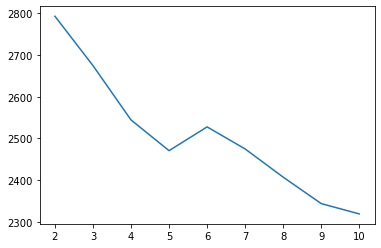

In [42]:
plt.plot(K, AIC.values())

# plt.plot(K, BIC.values())

In [44]:
print(AIC.values())

dict_values([2792.9413159219735, 2674.5806023233317, 2544.2183281806733, 2470.528353210394, 2527.520472485593, 2474.617102824386, 2406.972108977942, 2343.5357132359286, 2318.793661548784])


In [109]:
gm = GaussianMixture(n_components=5).fit(X)
gm.predict(X)

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 0, 0, 4, 4, 0, 4, 4, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3])

In [121]:
df['k5'] = gm.predict(X)
df['batsman'].loc[df['k5'] == 0]

<ipython-input-121-c6822d068428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k5'] = gm.predict(X)


36          SC Ganguly
37            AJ Finch
40           SV Samson
43           SS Tiwary
44           DJ Hussey
45          TM Dilshan
46        F du Plessis
49       Mandeep Singh
50             KK Nair
51         LMP Simmons
52     Y Venugopal Rao
53         LRPL Taylor
54           ML Hayden
55            HH Gibbs
56           A Symonds
57          GJ Maxwell
58            CL White
59        MC Henriques
60        KP Pietersen
61             M Vohra
62            MS Bisla
63          EJG Morgan
65          MA Agarwal
66            GC Smith
67           KM Jadhav
68             SS Iyer
69           STR Binny
70          AD Mathews
71            KL Rahul
73            AM Nayar
74            TL Suman
76           Q de Kock
77           GJ Bailey
78            AR Patel
79            M Manhas
80            SA Yadav
81           RS Bopara
82           PP Chawla
87         JP Faulkner
88             OA Shah
90     Shakib Al Hasan
91            A Mishra
95             J Botha
96         

(array([ 1.,  1.,  6., 12., 32., 46., 61., 39., 10.,  4.]),
 array([0.19607843, 0.26204751, 0.32801659, 0.39398567, 0.45995475,
        0.52592383, 0.59189291, 0.65786199, 0.72383107, 0.78980015,
        0.85576923]),
 <BarContainer object of 10 artists>)

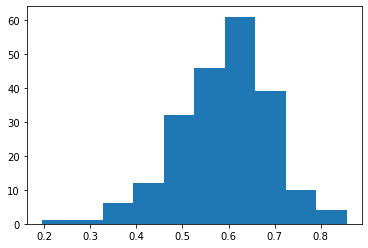

In [85]:
plt.hist(df1['running_between_wickets'])

In [159]:
dfb = pd.read_csv("bowleratt.csv")
dfb.head()

,Unnamed: 0,player,count,innings,bm4,totalwickets,bm5,X,Economy,Wicket.Taking.Ability,Consistency
0,309,Sohail Tanvir,2,11,0.181818,24,2.444444,140,6.226415,11.041667,11.458333
1,13,A Zampa,1,11,0.090909,19,1.800000,157,7.493333,11.842105,14.789474
2,81,CRD Fernando,1,10,0.100000,19,2.000000,147,7.373494,13.105263,16.105263
3,191,MF Maharoof,1,20,0.050000,33,1.684211,95,7.238095,13.363636,16.121212
4,343,WPUJC Vaas,0,13,0.000000,22,1.692308,129,7.583333,13.090909,16.545455


In [163]:
bowlersData = dfb.drop(columns = ['Unnamed: 0', 'X', 'player','count'])
bowlersData.head()

,innings,bm4,totalwickets,bm5,Economy,Wicket.Taking.Ability,Consistency
0,11,0.181818,24,2.444444,6.226415,11.041667,11.458333
1,11,0.090909,19,1.800000,7.493333,11.842105,14.789474
2,10,0.100000,19,2.000000,7.373494,13.105263,16.105263
3,20,0.050000,33,1.684211,7.238095,13.363636,16.121212
4,13,0.000000,22,1.692308,7.583333,13.090909,16.545455


In [165]:
bowlersData = bowlersData.replace(0, 0.001)
(bowlersData == 0).sum()

innings                  0
bm4                      0
totalwickets             0
bm5                      0
Economy                  0
Wicket.Taking.Ability    0
Consistency              0
dtype: int64

In [166]:
X = bowlersData.to_numpy()

In [167]:
K = range(2,11)
AIC = {}
BIC = {}
for k in K:
    gm = GaussianMixture(n_components=k).fit(X)
    AIC[k] = gm.aic(X)
    BIC[k] = gm.bic(X)

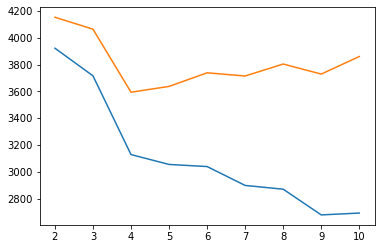

In [168]:
plt.plot(K, AIC.values())
plt.plot(K, BIC.values())

In [183]:
gm = GaussianMixture(n_components=4,random_state=12345).fit(X)
dfb['k5'] = gm.predict(X)

In [184]:
dfb['player'].loc[dfb['k5'] == 3]

26           CH Morris
27            MM Patel
28      Sandeep Sharma
33           S Aravind
34          JD Unadkat
35           YS Chahal
41           RJ Harris
47     Shakib Al Hasan
51              P Negi
55       Harmeet Singh
56          MG Johnson
62      MJ McClenaghan
67             P Awana
68         JP Faulkner
69            SK Warne
74       Iqbal Abdulla
78           KV Sharma
81           STR Binny
87            AR Patel
91            R Sharma
94      M Muralitharan
98          SK Trivedi
99          KA Pollard
102           HV Patel
103          JJ Bumrah
105       Yuvraj Singh
108        NLTC Perera
111        S Sreesanth
118         PJ Sangwan
119          SB Jakati
122       DT Christian
123       MC Henriques
128           DR Smith
134           VR Aaron
139          YK Pathan
140          JH Kallis
145            MS Gony
155         AB Agarkar
163           SK Raina
164           I Sharma
Name: player, dtype: object

In [176]:
sum(dfb['player'].value_counts().values > 1)

0

In [185]:
from sklearn.cluster import KMeans

In [191]:
X = df1.to_numpy()

In [192]:
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(km.inertia_)

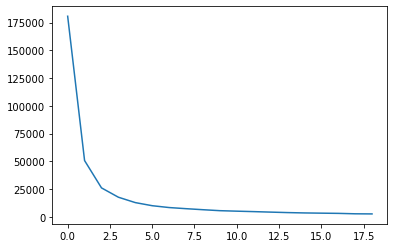

In [193]:
plt.plot(wcss)

In [195]:
km = KMeans(n_clusters=5, random_state=0).fit(X)

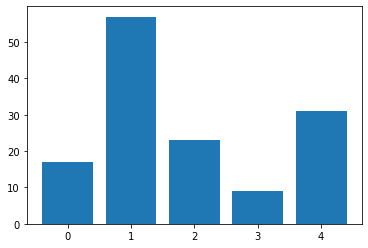

In [198]:
pred = km.predict(X)
unique, counts = np.unique(km.labels_, return_counts=True)
#unique = ('0', '1', '2','3','4')
plt.bar(unique, counts)
plt.show()

In [207]:
# df['k5'] = pred
df['batsman'].loc[df['k5'] == 3]


0        V Kohli
1      G Gambhir
2       SK Raina
3      RG Sharma
4       S Dhawan
5     RV Uthappa
7       MS Dhoni
11    KD Karthik
15     YK Pathan
Name: batsman, dtype: object